<a href="https://colab.research.google.com/github/AishaSR/SYSC4906/blob/myWork/ARobinson_Assig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYSC4906 Introduction to Machine Learning
## Assignment 1
|**Student name** | **Student number**|
|-----------------|-------------------|
| Aisha Robinson | 101175471 |

# Question 1
  i) Calculate the gradient of the following function: 
$$ f(x,y,z) \stackrel{\text{def}}{=} x^3z - 2xy^2 + 5z $$

  ii) What does this vector represent?

$$ \Delta f(x,y,z)= \begin{cases}{\delta{f} \over \delta{x}} (x, y, z) \\
{\delta{f} \over \delta{y}} (x, y, z) \\
{\delta{f} \over \delta{z}} (x, y, z)\end{cases} $$

$$ \Delta f(x,y,z)= \begin{cases}3x^2z - 2y^2 \\
-4xy \\
x^3 + 5\end{cases} $$

Evaluated at the point (-3, -2, 1): 
$$ \Delta f(x,y,z)= \begin{cases}19 \\
-24 \\
-22 \end{cases} $$

$$ \Delta f(x,y,z)= \langle 19, -24, -22 \rangle$$

The gradient vector at a point represents the direction of maximum increase in the function as well as the rate of increase which is represented by the magnitude of the vector.

# Question 2
*(see text of question in assignment instructions)*

Sample:  [1, 4, 4, 3, 4, 3, 1, 3, 2, 3]

1.   What is the expected value from this sample? Using an unbiased estimator, what is the sample variance and standard deviation?

$$ Expected Value = \boldsymbol{2.8} $$
Unbiased Sample Variance:
$$ \sigma^2 = {\sum_{n=1}^{N}(x_{i}-\bar{x})^2 \over n-1} = \boldsymbol{1.289}$$
Standard Deviation:
$$ \sqrt[2]{\sigma^2} = \boldsymbol{1.135}$$

2.   What is $Pr(2)$?

| x    | 1    | 2    | 3    | 4    | 5    |
|------|------|------|------|------|------|
|Pr(x) | 0.20 | ??   | 0.30 | 0.30 | 0.05 |
|Pr(+\|x)| 0.10 | 0.15 | 0.20 | 0.40 | 0.70 |

A probability mass function should sum to 1 therefore given all the other values:
$$Pr(2) = \boldsymbol{0.15}$$


3.   Find the expected value and the variance for $Pr(x)$.<br>
Expected Value:
$$E(x) = 0.20 + (2\cdot0.15) + (3\cdot 0.30) + (4 \cdot 0.30) + (5 \cdot 0.05)$$
$$E(x) = \boldsymbol{2.85}$$
Variance:
$$Var(x) = (1-2.85)^2\cdot0.20 + ((2-2.85)^2\cdot0.15) + ((3-2.85)^2\cdot 0.30) + ((4-2.85)^2 \cdot 0.30) + ((5-2.85)^2 \cdot 0.05) = \boldsymbol{1.43}$$

4.   Find the probability that a patient has a symptom severity of $x=5$, given that they tested negative for COVID-19. That is, find $Pr(5|-)$. Hint: $Pr(+)$ can be found by summing over $Pr(+|x)Pr(x)$, for all $x$. $Pr(-|x)$ can be derived from $Pr(+|x)$.

$$P(5|-) = {{P(-|5) \cdot P(-)} \over P(+)} = {0.30 \cdot 0.74 \over 0.26} = \boldsymbol{0.865}$$

#Question 3

Create a python notebook which loads the Kaggle Heart attack possibility dataset (https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility). This dataset has 13 features each and 2 classes of heart attack possibility: target: 0= less chance of heart attack; 1= more chance of heart attack. *Hint: look at the notebooks from Tutorials 2 & 3 for example code for achieving the steps below.* 

    a) Split the data, using 75% for training and 25% for test. Make sure you use stratified sampling. 

    b) Train and test a logistic regression classifier. How accurate is your classifier?
    c) Repeat part b), only the age and resting blood pressure features from the dataset. Was the classifier accuracy impacted?
    d) Using the (two feature) classifier from part c), create two subplots using the first two features from the data set. 
    
        i)  On the first, plot the decision boundary and the training data.  Use green for less chance (target==0) and blue for more chance (target==1).
        ii) On the second, plot the decision boundary and the test data. Use the same colours (blue/green), but highlight all misclassified test points (from either class) in red.




In [ ]:
# Load libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


## Q3.a) Create the dataset






The first step is loading the Kaggle Heart Attack data. We will then split off the test data to be used for all training sets. Then create each training set, using **stratified sampling**

In [ ]:
# Load the Kaggle Heart Attack dataset
file = 'https://raw.githubusercontent.com/AishaSR/SYSC4906/myWork/F2020/Assignments/Assignment1/heart.csv'
heartData = pd.read_csv(file)

# set the column headers
df = pd.DataFrame(heartData, columns= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Q3.b) Logistic Regression


In [ ]:
x = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']

#standardize x
x = StandardScaler().fit_transform(x)

#Split data into training and test segments
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.25, stratify=y)

# Construct Logistic Regression Model
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Prediction Accuracy of Logistic Classifier is: %s" % score)



Prediction Accuracy of Logistic Classifier is: 0.8289473684210527


## Q3.c) Logistic Regression with only 2 features


In [ ]:
#Training a logistic regression model using only Age and Resting Blood Pressure
x2 = df[['age', 'trestbps']]
y2 = df['target']

#standardize x
x2 = StandardScaler().fit_transform(x2)

#Split data into training and test segments
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size =0.25, stratify=y2)

# Construct Logistic Regression Model
clf2 = LogisticRegression(random_state=0).fit(x2_train, y2_train)
score2 = clf2.score(x2_test, y2_test)
print("Prediction Accuracy of Two Feature Logistic Classifier is: %s" % score2)



Prediction Accuracy of Two Feature Logistic Classifier is: 0.5131578947368421


##What happended to the accuracy?

The classifier accuracy was significantly reduced by the new choice of features. This indicates that the features chosen are not the most predictive in the dataset. Because the use of the full data set resulted in a higher accuracy score is is safe to assume there are better features (better at predicting the target) contained in it. By correlating each pair of features we may be able to get a better idea of which features would be useful for predicting the target. This is illustrated below. The regression is re run using 2 better correlated features and the accuracy score improves. Increasing the number of variables used is another way to improve the score. If there are more than two features comparatively moree correlated with the target than others as seen in the correlation matrix below then using a larger combination of features can be beneficial.

In [ ]:
#compute and print correlation matrix
correlationMatrix = df.corr()
print(correlationMatrix)

               age       sex        cp  ...        ca      thal    target
age       1.000000 -0.098447 -0.068653  ...  0.276326  0.068001 -0.225439
sex      -0.098447  1.000000 -0.049353  ...  0.118261  0.210041 -0.280937
cp       -0.068653 -0.049353  1.000000  ... -0.181053 -0.161736  0.433798
trestbps  0.279351 -0.056769  0.047608  ...  0.101389  0.062210 -0.144931
chol      0.213678 -0.197912 -0.076904  ...  0.070511  0.098803 -0.085239
fbs       0.121308  0.045032  0.094444  ...  0.137979 -0.032019 -0.028046
restecg  -0.116211 -0.058196  0.044421  ... -0.072042 -0.011981  0.137230
thalach  -0.398522 -0.044020  0.295762  ... -0.213177 -0.096439  0.421741
exang     0.096801  0.141664 -0.394280  ...  0.115739  0.206754 -0.436757
oldpeak   0.210013  0.096093 -0.149230  ...  0.222682  0.210244 -0.430696
slope    -0.168814 -0.030711  0.119717  ... -0.080155 -0.104764  0.345877
ca        0.276326  0.118261 -0.181053  ...  1.000000  0.151832 -0.391724
thal      0.068001  0.210041 -0.161736

In [ ]:
#Training a logistic regression model using the two highest correlated features
x3 = df[['cp', 'thalach']]
y3 = df['target']

#standardize x
x3 = StandardScaler().fit_transform(x3)

#Split data into training and test segments
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size =0.25, stratify=y3)

# Construct Logistic Regression Model
clf3 = LogisticRegression(random_state=0).fit(x3_train, y3_train)
score3 = clf3.score(x3_test, y3_test)
print("Prediction Accuracy of New Logistic Classifier is: %s" % score3)

Prediction Accuracy of New Logistic Classifier is: 0.75


## Q3.d) Visualizing the results of the two feature regression


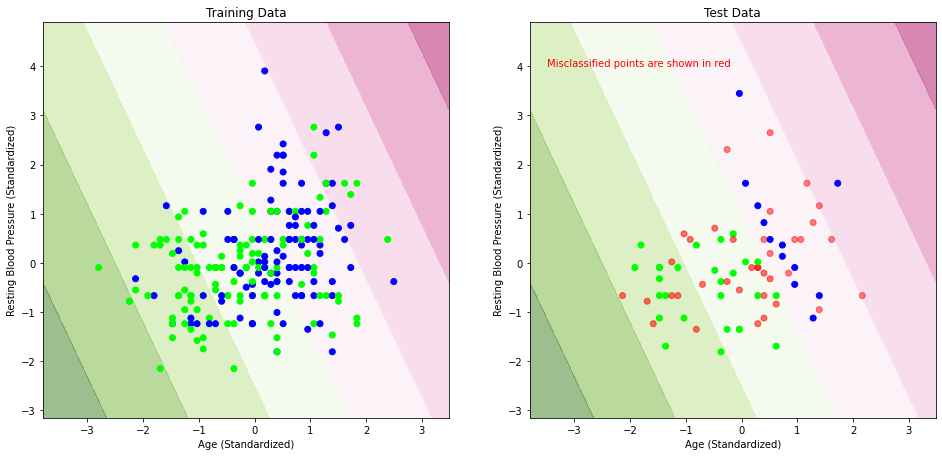

In [ ]:
#Plot datasets
plt.figure(figsize=(16,16))
subplot_dim = (2,2) # For a 2x2 plot

# Set plot axis limits
x_min, x_max = x2_train[:,0].min() - 1.0, x2_train[:,0].max() + 1.0
y_min, y_max = x2_train[:,1].min() - 1.0, x2_train[:,1].max() + 1.0
    
# Create mesh for visualization
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Plot the decision boundary by assigning a color to each point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf2.decision_function(np.c_[xx.ravel(), yy.ravel()]) 


# Put the result into a color plot
Z = Z.reshape(xx.shape)

#Define plot colors
cm = plt.cm.PiYG
cm_train = ListedColormap(['#0000FF', '#00FF00'])
cm_test = ListedColormap(['#0000FF', '#00FF00', '#FF000080', '#FF000090'])

#plot training data 
plt.subplot(subplot_dim[0], subplot_dim[1], 1).contourf(xx, yy, Z, cmap=cm, alpha=.5)
plt.scatter(x2_train[:,0], x2_train[:,1], c=y2_train, cmap=cm_train)
plt.title('Training Data')
plt.xlabel("Age (Standardized)")
plt.ylabel("Resting Blood Pressure (Standardized)")

#create separator for misclassified points
predicted_y = clf2.predict(x2_test)

ny2_test = y2_test.to_numpy()
misclassified = predicted_y

for i in range(0, len(predicted_y)):
  if predicted_y[i] - ny2_test[i] == -1:
    misclassified[i] = 2
  elif predicted_y[i] - ny2_test[i] == 1:
    misclassified[i] = 3

#Plot test data and misclassified points
plt.subplot(subplot_dim[0], subplot_dim[1], 2).contourf(xx, yy, Z, cmap=cm, alpha=.5)
plt.scatter(x2_test[:,0], x2_test[:,1], c=misclassified, cmap=cm_test)
plt.title('Test Data')
plt.xlabel("Age (Standardized)")
plt.ylabel("Resting Blood Pressure (Standardized)")
plt.text(-3.5, 4, 'Misclassified points are shown in red', color='red', fontsize=10)




plt.show()

# Question 4

Linear regression. Download the file “Assig1Q3.csv” from GitHub under “Assignments/Assignment1”. The first column represents the X values, while the second column represents the Y values.
* Plot the data

We are going to use linear regression to fit a linear and a quadratic model to these data. Without using sklearn.linear_model (or any other linear regression libraries), write your own python code to implement the least squares solution for linear regression. That is:
$$\beta=(X^TX)^{−1}X^Ty$$

* Assuming the model $y=mx+b$, use your code to best-fit the parameters $m$ and $b$ to the data. Report your optimal parameter values. 
*Hints: 
    * recall that you must create the ‘augmented’ feature vector $X$ from the given $x$ data (add a column of 1’s). 
    * look at numpy.T(), numpy.matmul(), numpy.dot(), and numpy.linalg.inv()
* Plot your line of best fit on top of the data
* Calculate the sum of square residuals, or mean squared error, as in:
$$MSE(\beta) = \sum_{i=1}^{N}{(y−X\beta)^2}$$
* Assuming the model $y=ax^2+bx+c$, repeat steps 2-4 using this new model (i.e. estimate the optimal values for $a$,$b$,$c$; report those estimates; plot the line of best fit; report the MSE).
* Briefly discuss which model would you prefer for these data?
* Why is best-fitting the second (quadratic) model still considered linear regression?



## Step 1: Load the CSV file

Text(0, 0.5, 'y')

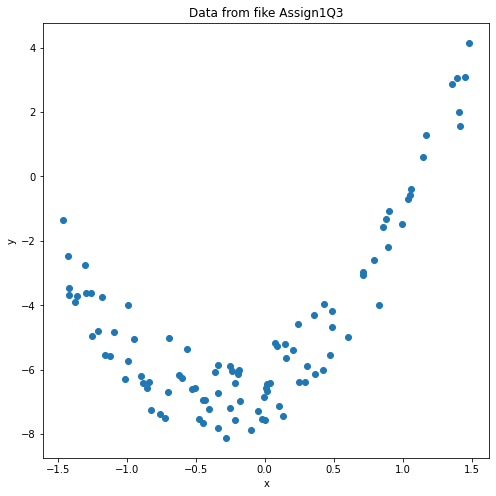

In [ ]:
import pandas as pd
from numpy.linalg import inv

data = pd.read_csv('https://raw.githubusercontent.com/AishaSR/SYSC4906/myWork/F2020/Assignments/Assignment1/Assig1Q3.csv',header=None)

# set the column headers
df = pd.DataFrame(data)
df = df.sort_values(by=0)

plt.figure(figsize=(8,8))
plt.scatter(df[0], df[1])
plt.title("Data from fike Assign1Q3")
plt.xlabel("x")
plt.ylabel("y")


## Step 2: Linear model $y=mx+b$

Text(0, 0.5, 'y')

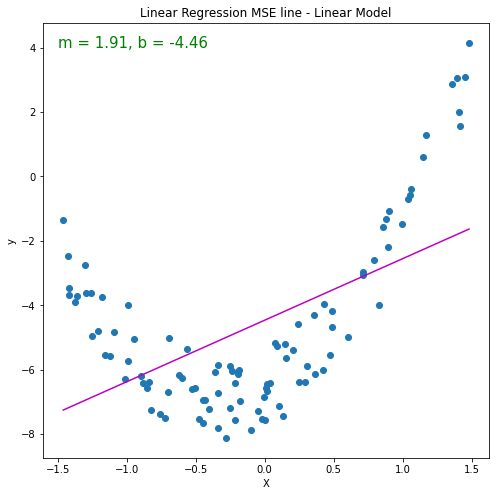

In [ ]:
# Augment the x vector
X = df[0].to_numpy()
Y = df[1].to_numpy()

augX = np.c_[np.ones(len(X)), X] 

# Compute beta
augXT = augX.T
augXT_X = np.matmul(augXT, augX)
augXT_Xinv = inv(augXT_X)
transProd = np.matmul(augXT_Xinv, augXT)
beta = np.matmul(transProd, Y)


plt.figure(figsize=(8,8))
plt.scatter(X, Y)
n = len(augX)
pltY = np.zeros(n)
for i in range(0,n):
    pltY[i] = np.dot(beta, augX[i])

#print(pltY)
plt.plot(X, pltY, 'm')
#df.plot(x=0, y=1, kind='scatter')

plt.text(-1.5, 4, 'm = %s, b = %s' %(beta[1].round(2), beta[0].round(2)), color='green', fontsize=15)
plt.title('Linear Regression MSE line - Linear Model')
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
# Compute the MSE
diff = Y - pltY
square = np.square(diff)
sum = np.sum(square)
#print(sum)
MSE = sum/len(Y)

print("MSE =", MSE)

MSE = 5.403948277421324


## Step3: Quadratic model $y=ax^2+bx+c$

Text(0, 0.5, 'y')

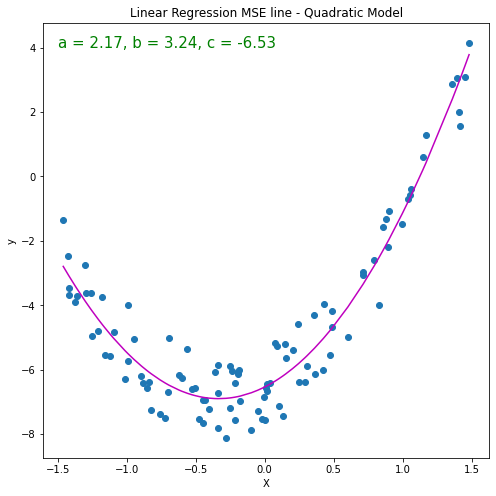

In [ ]:
augX = np.c_[np.ones(len(X)), np.square(X), X] 

# Compute beta
augXT = augX.T

augXT_X = np.matmul(augXT, augX)
augXT_Xinv = inv(augXT_X)
transProd = np.matmul(augXT_Xinv, augXT)
beta = np.matmul(transProd, Y)


plt.figure(figsize=(8,8))
plt.scatter(X, Y)
n = len(augX)

pltY = np.zeros(n)
for i in range(0,n):
    pltY[i] = np.dot(beta, augX[i])

#print(pltY)
plt.plot(X, pltY, color='m')

plt.text(-1.5, 4, 'a = %s, b = %s, c = %s' %(beta[2].round(2), beta[1].round(2), beta[0].round(2)), color='green', fontsize=15)
plt.title('Linear Regression MSE line - Quadratic Model')
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
# Compute the MSE
diff = Y - pltY
square = np.square(diff)
sum = np.sum(square)
MSE = sum/len(Y)

print("MSE =", MSE)

MSE = 0.5683137448906699


7. Briefly discuss which model would you prefer for these data?<br>
The point of the least squares method is to create a model which reduces the mean squared error. Given two models, one with an MSE much smaller than the other, it follows that the model with the smaller MSE should be chosen. This happens to be the quadratic model. However, even before calculating the MSE's, a visual inspection of the data shows that it follows a roughly quadratic pattern and so a quadratic model would be most suitable.

8. Why is best-fitting the second (quadratic) model still considered linear regression?<br>
Polynomial regression models like quadratic allow modeling of a nonlinear relationship between X and Y. However they are still considered linear regressions because the regression coefficients $\beta, \beta_1$ etc. are linear.

# Question 5

- Create a Jupyter Notebook based on `Tutorial-3_ComparingMultipleClassifiers.ipynb` to use `make_classification` to create a linearly separable dataset, with 2 classes, 2 informative features, 1500 samples per class, using a class_sep=1.7, and a random_state of 5. 
- Generate some random noise of the same shape as your feature data, drawn from a standard normal distribution (see `numpy.random`) and a random_state of 5. 
- Create four datasets: 
    1. no noise, 
    2. data + 0.5 * noise, 
    3. data + 1.0 * noise, 
    4. data + 2.0 * noise. 
- i) For all four datasets, plot the data, labelling each (sub)plot by the degree of noise added (i.e. 0, 0.5, 1.0, and 2.0)
- ii) For each dataset, create training and test data using a 70/30 train/test split (see train_test_split).
- iii) For each dataset, train and test an SVM classifier with a polynomial kernel with `degree=2`, and `C=1.0`. Report the test score for each. How does prediction accuracy change with noise level?
- iv) For a noise level of 0.5, train and test SVM classifiers using the following values for $C: \{0.001, 0.01, 0.1, 1, 10, 100\}$. 
   - Report the test accuracy for each. 
   - How does performance vary with $C$?
   - Briefly describe what the $C$ controls for sklearn.svc. *Hint: look at the documentation for `sklearn.svc` rather than the class notes here...*


In [ ]:
# Load the required libraries...
from sklearn.datasets import make_classification
from sklearn.svm import SVC


###Generate and plot datasets:

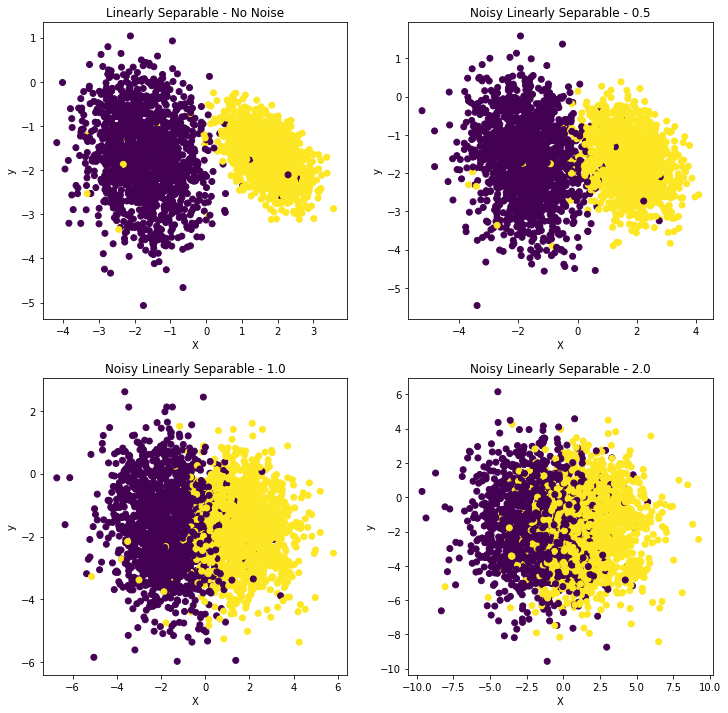

In [ ]:
#create a linearly separable dataset, with 2 classes, 2 informative features, 1500 samples per class, 
#using a class_sep=1.7, and a random_state of 5.
X, y = make_classification(n_samples=3000, n_features=2, n_redundant=0, n_informative=2, random_state=5, n_classes=2, n_clusters_per_class=1, class_sep=1.7)

# Put into tuple format
linsep_data = (X, y)

# Generate standard normal distribution noise same shape as the data
rng = np.random.RandomState(5) # Initialize random number generator
noise = rng.standard_normal(size=X.shape)

#Generate noisy sets
Xh = X + 0.5 * noise
nHalf_linsep_data = (Xh, y)

Xo = X + 1.0 * noise
nOne_linsep_data = (Xo, y)

Xt = X + 2.0 * noise
nTwo_linsep_data = (Xt, y)

# Gather datasets
datasets = [linsep_data, nHalf_linsep_data, nOne_linsep_data, nTwo_linsep_data]
dataset_names= ["Linearly Separable - No Noise", "Noisy Linearly Separable - 0.5", "Noisy Linearly Separable - 1.0", "Noisy Linearly Separable - 2.0"]

#Plot datasets
plt.figure(figsize=(12,12))
subplot_dim = (2,2) # For a 2x2 plot

for i in range(len(datasets)):
  plt.subplot(subplot_dim[0], subplot_dim[1], i+1)
  plt.scatter(datasets[i][0][0:,0], datasets[i][0][0:,1], c=datasets[i][1])
  plt.title(dataset_names[i])
  plt.xlabel("X")
  plt.ylabel("y")


In [ ]:
#Define SVM Classifier
classifier = SVC(kernel= 'poly', degree=2, C=1.0)

counter = 0 #A counter to track datasets

for dSet in datasets:
  # Split into training and test sets
  X, y = dSet
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

  # Train and test classifier
  classifier.fit(X_train, y_train) # create classification model using training data
  score = classifier.score(X_test, y_test) # evaluate classifier on the testing set

  print("Test Score for %s: %.2f" % (dataset_names[counter], score))
  counter += 1


Test Score for Linearly Separable - No Noise: 0.98
Test Score for Noisy Linearly Separable - 0.5: 0.96
Test Score for Noisy Linearly Separable - 1.0: 0.81
Test Score for Noisy Linearly Separable - 2.0: 0.63


### How does prediction accuracy change with noise level?

Prediction accuracy decreases as noise level increases. This is because more noise reduces the separability of the data. This results in the reduced ability to draw an accurate decision boundary and so more points will be misclassified. 

In [ ]:
#Investigating effect of C value on prediction accuracy 
#Using data set with noise * 0.5

cValues = [0.001,0.01,0.1,1,10,100]

for cval in cValues:
  classifier = SVC(kernel= 'poly', degree=2, C=cval)

  X, y = datasets[1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
  
  # Train and test classifier
  classifier.fit(X_train, y_train) # create classification model using training data
  score = classifier.score(X_test, y_test) # evaluate classifier on the testing set

  print("Test Score for C value of %s: %.2f" % (cval, score))


Test Score for C value of 0.001: 0.91
Test Score for C value of 0.01: 0.94
Test Score for C value of 0.1: 0.96
Test Score for C value of 1: 0.96
Test Score for C value of 10: 0.94
Test Score for C value of 100: 0.96


### What does C control in SVM generally?

The aim of SVM is to draw a decision boundary wich separates the classes. Achieving this perfectly is rearely possible with real data and so having some tolerance for misclassified data is nessesary. The 
C parameter in SVM introduces a penalty for misclassified data points. When C is small, the penalty is small so the decision boundary will be drawn with greater leeway or greater margin resulting in some misclassified points but a more generalized model. When C is large SVM will attempt to draw a margin which minimizes the nunber of misclassified points leading to a smaller margin and possibly running the risk of being overfitted. 

### How does prediction accuracy change with C in our model?
As C increased the prediction accuracy increases marginally. This is the inverse of the behavior of C that is explained in the following question. The sklearn library however, implements C such that "The strength of the regularization is inversely proportional to C" - sklearn.svm.SVC documentation, which explains why we have the prediction acuracy increasing with C rather than the opposite.


